In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [21]:
os.chdir(r'/home/devbox2/chetanya/dataSheets')
os.getcwd()

'/home/devbox2/chetanya/dataSheets'

In [22]:
retail_new_clean=pd.read_csv('retail_new_clean.csv')

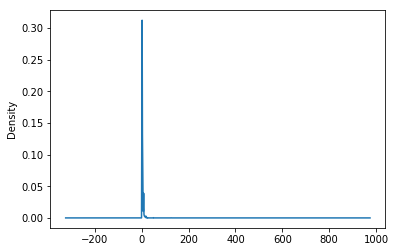

In [23]:
retail_new_clean['UnitPrice'].plot(kind='kde')

In [6]:
retail_new_clean['UnitPrice'].describe()

count    363096.000000
mean          2.880246
std           4.024197
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [7]:
retail_new_clean_upfilter = retail_new_clean[retail_new_clean['UnitPrice']<=16.95]

In [8]:
retail_new_clean_upfilter.describe()

,InvoiceNo,UnitPrice,CountInvoices,logCountInvoices,logUnitPrice,Cluster_index
count,361645.000000,361645.000000,361645.000000,361645.000000,361645.000000,361645.000000
mean,560701.170819,2.755359,414.346483,2.436685,0.274193,1.101608
std,12867.859224,2.654485,375.282629,0.439681,0.386699,0.329519
min,536366.000000,0.001000,1.000000,0.000000,-3.000000,0.000000
25%,549730.000000,1.250000,153.000000,2.184691,0.096910,1.000000
50%,561774.000000,1.950000,301.000000,2.478566,0.290035,1.000000
75%,571931.000000,3.750000,548.000000,2.738781,0.574031,1.000000
max,581587.000000,16.950000,2260.000000,3.354108,1.229170,2.000000


In [9]:
retail_new_clean_upfilter_clusterfilter=retail_new_clean_upfilter[retail_new_clean_upfilter['Cluster_index']==0]

In [10]:
retail_new_clean_upfilter_clusterfilter.describe()

,InvoiceNo,UnitPrice,CountInvoices,logCountInvoices,logUnitPrice,Cluster_index
count,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.0
mean,556951.100384,3.322303,6.681586,0.759630,0.347630,0.0
std,14213.093847,2.931324,2.977845,0.270959,0.428958,0.0
min,536367.000000,0.001000,1.000000,0.000000,-3.000000,0.0
25%,544042.500000,1.250000,4.000000,0.602060,0.096910,0.0
50%,554991.000000,2.510000,7.000000,0.845098,0.399674,0.0
75%,569871.000000,4.250000,9.000000,0.954243,0.628389,0.0
max,581538.000000,16.950000,11.000000,1.041393,1.229170,0.0


In [31]:
rateMe=lambda x: (x/16.95)*10

In [32]:
retail_new_clean_upfilter_clusterfilter['ratings']=retail_new_clean_upfilter_clusterfilter['UnitPrice'].apply(rateMe)

/home/devbox2/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
#rateMeMore=lambda x:0 if x<2.5 else 1 

In [34]:
#retail_new_clean_upfilter_clusterfilter['ratings']=retail_new_clean_upfilter_clusterfilter['ratings'].apply(rateMeMore)

In [37]:
retail_new_clean_upfilter_clusterfilter.head()

,InvoiceNo,StockCode,Description,UnitPrice,CountInvoices,logCountInvoices,logUnitPrice,Cluster_index,ratings
3484,536367,21777,recipeboxwithmetalheart,7.95,6,0.778151,0.900367,0,4.690265
3485,536562,21777,recipeboxwithmetalheart,7.95,6,0.778151,0.900367,0,4.690265
3486,536588,21777,recipeboxwithmetalheart,7.95,6,0.778151,0.900367,0,4.690265
3487,536592,21777,recipeboxwithmetalheart,7.95,6,0.778151,0.900367,0,4.690265
3488,537237,21777,recipeboxwithmetalheart,7.95,6,0.778151,0.900367,0,4.690265


In [38]:
short_data = retail_new_clean_upfilter_clusterfilter.iloc[:,[0,2,8]]

In [39]:
short_data.reset_index(drop = True, inplace = True)
short_data.shape
short_data.head(10)

,InvoiceNo,Description,ratings
0,536367,recipeboxwithmetalheart,4.690265
1,536562,recipeboxwithmetalheart,4.690265
2,536588,recipeboxwithmetalheart,4.690265
3,536592,recipeboxwithmetalheart,4.690265
4,537237,recipeboxwithmetalheart,4.690265
5,537240,recipeboxwithmetalheart,4.690265
6,536381,girlypinktoolset,2.920354
7,536401,silverlookingmirror,2.920354
8,545337,silverlookingmirror,2.920354
9,536401,pinkovaljewelledmirror,3.510324


In [40]:
#short_data['code'] = short_data['Description'].to_dict()

In [41]:
short_data.head()

,InvoiceNo,Description,ratings
0,536367,recipeboxwithmetalheart,4.690265
1,536562,recipeboxwithmetalheart,4.690265
2,536588,recipeboxwithmetalheart,4.690265
3,536592,recipeboxwithmetalheart,4.690265
4,537237,recipeboxwithmetalheart,4.690265


In [43]:
short_data.to_csv('short_data.csv',index=False)

In [405]:
short_data['ratings'].describe()

count    3128.000000
mean        0.258632
std         0.437953
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ratings, dtype: float64

In [400]:
#shorter_data=short_data.iloc[:,[0,2]]

In [422]:
short_data.tail()

,InvoiceNo,Description,ratings
3123,581404,creamhangingheartt-lightholder,0
3124,581412,creamhangingheartt-lightholder,0
3125,581538,creamhangingheartt-lightholder,0
3126,581483,"papercraft,littlebirdie",0
3127,581492,ivorypendanttripleshellnecklace,1


In [1]:
'''def iterator(df):
    for i in df['Description']:
        val=df.get_value(i,'ratings')
        return val
'''        

"def iterator(df):\n    for i in df['Description']:\n        val=df.get_value(i,'ratings')\n        return val\n"

In [3]:
'''Invoice_vs_Description_matrix=(short_data.groupby(['InvoiceNo'])
                                        .apply(rate=iterator(short_data))
                                        .apply(pd.Series)
                                        .fillna(0)
                                        .reset_index())
'''                                        

"Invoice_vs_Description_matrix=(short_data.groupby(['InvoiceNo'])\n                                        .apply(rate=iterator(short_data))\n                                        .apply(pd.Series)\n                                        .fillna(0)\n                                        .reset_index())\n"

In [395]:
#Invoice_vs_Description_matrix=Invoice_vs_Description_matrix.set_index('Description')

In [4]:
#Invoice_vs_Description_matrix.head(20)

In [371]:
from sklearn.metrics.pairwise import pairwise_distances

In [372]:
jac_sim2 = 1 - pairwise_distances(Invoice_vs_Description_matrix.T, metric = 'jaccard')
jac_sim2 = pd.DataFrame(jac_sim2, index=Invoice_vs_Description_matrix.columns, columns=Invoice_vs_Description_matrix.columns)
jac_sim2.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


,536367,536381,536401,536409,536415,536446,536464,536488,536522,536525,...,581395,581402,581404,581405,581412,581439,581480,581483,581492,581538
536367,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
536381,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
536401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
536409,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
536415,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [379]:
check0=jac_sim2.iloc[0:1]
pd.DataFrame(check0)
check0=check0.sort_values(by=536367, ascending=True, axis=1)
check0.iloc[:,0:10]

,536367,562789,562775,562770,562710,562595,562583,562576,562553,562551
536367,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [373]:
'''def fast_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)
    '''

"def fast_similarity(ratings, kind='user', epsilon=1e-9):\n    # epsilon -> small number for handling dived-by-zero errors\n    if kind == 'user':\n        sim = ratings.dot(ratings.T) + epsilon\n    elif kind == 'item':\n        sim = ratings.T.dot(ratings) + epsilon\n    norms = np.array([np.sqrt(np.diagonal(sim))])\n    return (sim / norms / norms.T)\n    "

In [374]:
#user_similarity = fast_similarity(jac_sim2, kind='user')


In [155]:
#filter=lambda x: {y:1 for y in x[short_data.Description]}

In [156]:
'''short_data.pivot_table(
    values='ratings', index='InvoiceNo', columns='Description',
    fill_value=0,aggfunc=filter)
'''

"short_data.pivot_table(\n    values='ratings', index='InvoiceNo', columns='Description',\n    fill_value=0,aggfunc=filter)\n"

In [157]:
'''Invoice_vs_Description_ratings_matrix=(short_data.groupby(['InvoiceNo'])
                                .apply(lambda x: {y:short_data.loc[short_data.Description==short_data['Description'],[short_data.ratings]] for y in x['Description']})
                                .apply(pd.Series)
                                .fillna(0)
                                .reset_index()     )    '''                      

"Invoice_vs_Description_ratings_matrix=(short_data.groupby(['InvoiceNo'])\n                                .apply(lambda x: {y:short_data.loc[short_data.Description==short_data['Description'],[short_data.ratings]] for y in x['Description']})\n                                .apply(pd.Series)\n                                .fillna(0)\n                                .reset_index()     )    "

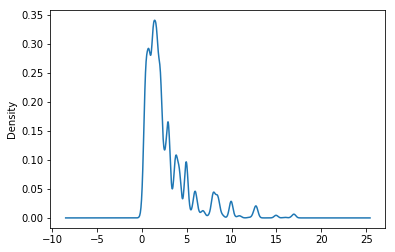

In [19]:
retail_new_clean_upfilter['UnitPrice'].plot(kind='kde')